# <center style="font-family:Arial">1. Introduction </center>

<div class="alert alert-block alert-info"
     style="color:black;
           display:fill;
           background-color:#e8f4f8;
           font-size:130%;
           font-family:Arial"><center>
<b> 📌 My goal is to predict, in the best possible way, the sales price of the houses based on their characteristics using different linear regression models.</b></center>
    </div>
    
 <div style="color:black;
           font-size:120%;
           font-family:Arial">
In this notebook, I'll be working with the Ames Housing dataset, a complete dataset containing every aspect of residential homes in Ames, Iowa. If you want to know more about the data, you can click <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data" target="_blank"> here</a>.
</div>

<hr style="height: 0.5px; border: 0; background-color: 'Black'">


![imageHouses](https://static.vecteezy.com/system/resources/previews/002/197/652/original/house-hand-drawn-set-design-illustration-isolated-on-white-background-free-vector.jpg)


## <center style="font-family:Arial">Importing the Data </center>



In [1]:
!pip install proplot
import warnings
warnings.filterwarnings('ignore') 

     |████████████████████████████████| 8.0 MB 751 kB/s 


In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# <center style="font-family:Arial">2. EDA </center>

In [3]:
# Defining plots design
def plots_design():
    fig.patch.set_facecolor('black')
    ax.patch.set_facecolor('black')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.yaxis.set_label_coords(0, 0)
    ax.grid(color='white', linewidth=2)
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    # Remove axes splines
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    # Font
    mpl.rcParams['font.family'] = 'Source Sans Pro'

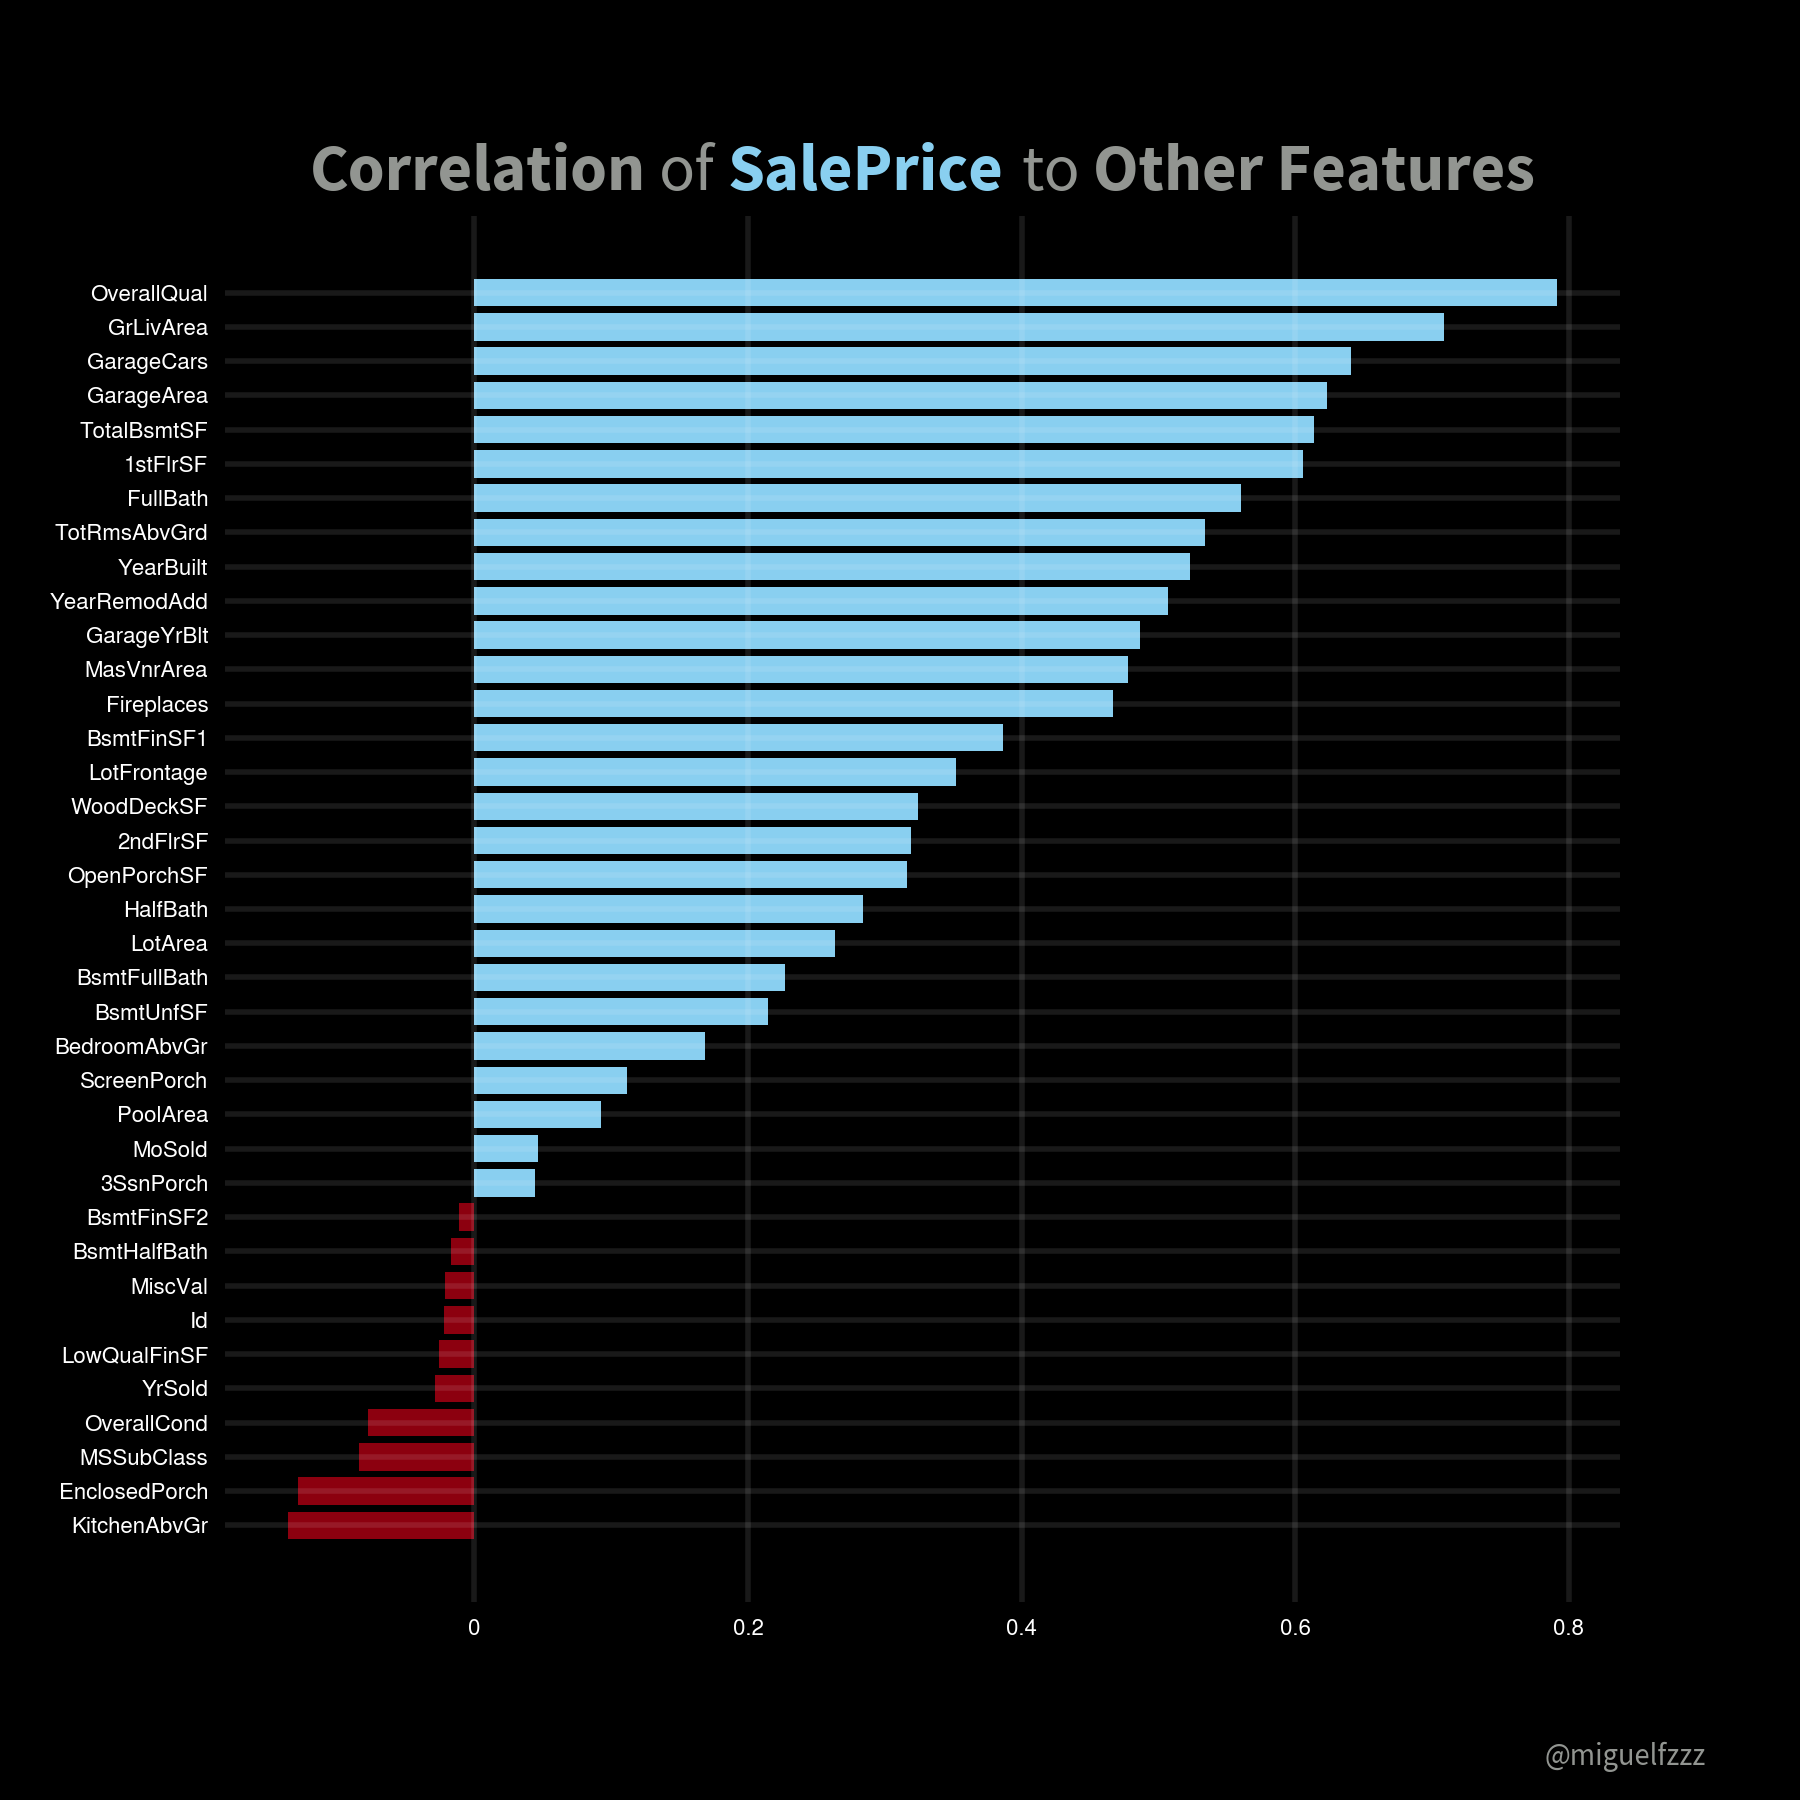

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt

corr = train[train.columns].corr()['SalePrice'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.SalePrice > 0.99].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 9))

ax.barh(corr.index, corr.SalePrice, align='center', color = np.where(corr['SalePrice'] < 0, 'crimson', '#89CFF0'))

plots_design()

plt.text(-0.12, 39, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(0.135, 39, "of", size=24, color="grey");
plt.text(0.185, 39, "SalePrice", size=24, color="#89CFF0", fontweight="bold");
plt.text(0.4, 39, "to", size=24, color="grey");
plt.text(0.452, 39, "Other Features", size=24, color="grey", fontweight="bold");

# Author
plt.text(0.9, -7, "@miguelfzzz", fontsize=11, ha="right", color='grey');

<div style="font-size:120%">In this plot, we can see the correlation of sales price with the rest of the numerical features. These are the highest positive correlations:</div>

* <div style="font-size:120%"><code>OverallQual</code>: Overall material and finish quality</div>
* <div style="font-size:120%"><code>GrLivArea</code>: Above grade (ground) living area in square feet</div>
* <div style="font-size:120%"><code>GarageCars</code>: Size of garage by car capacity</div>
* <div style="font-size:120%"><code>GarageArea</code>: Size of garage in square feet</div>
* <div style="font-size:120%"><code>TotalBsmtSF</code>: Total square feet of basement area</div>
* <div style="font-size:120%"><code>1stFlrSF</code>: First Floor square feet</div>

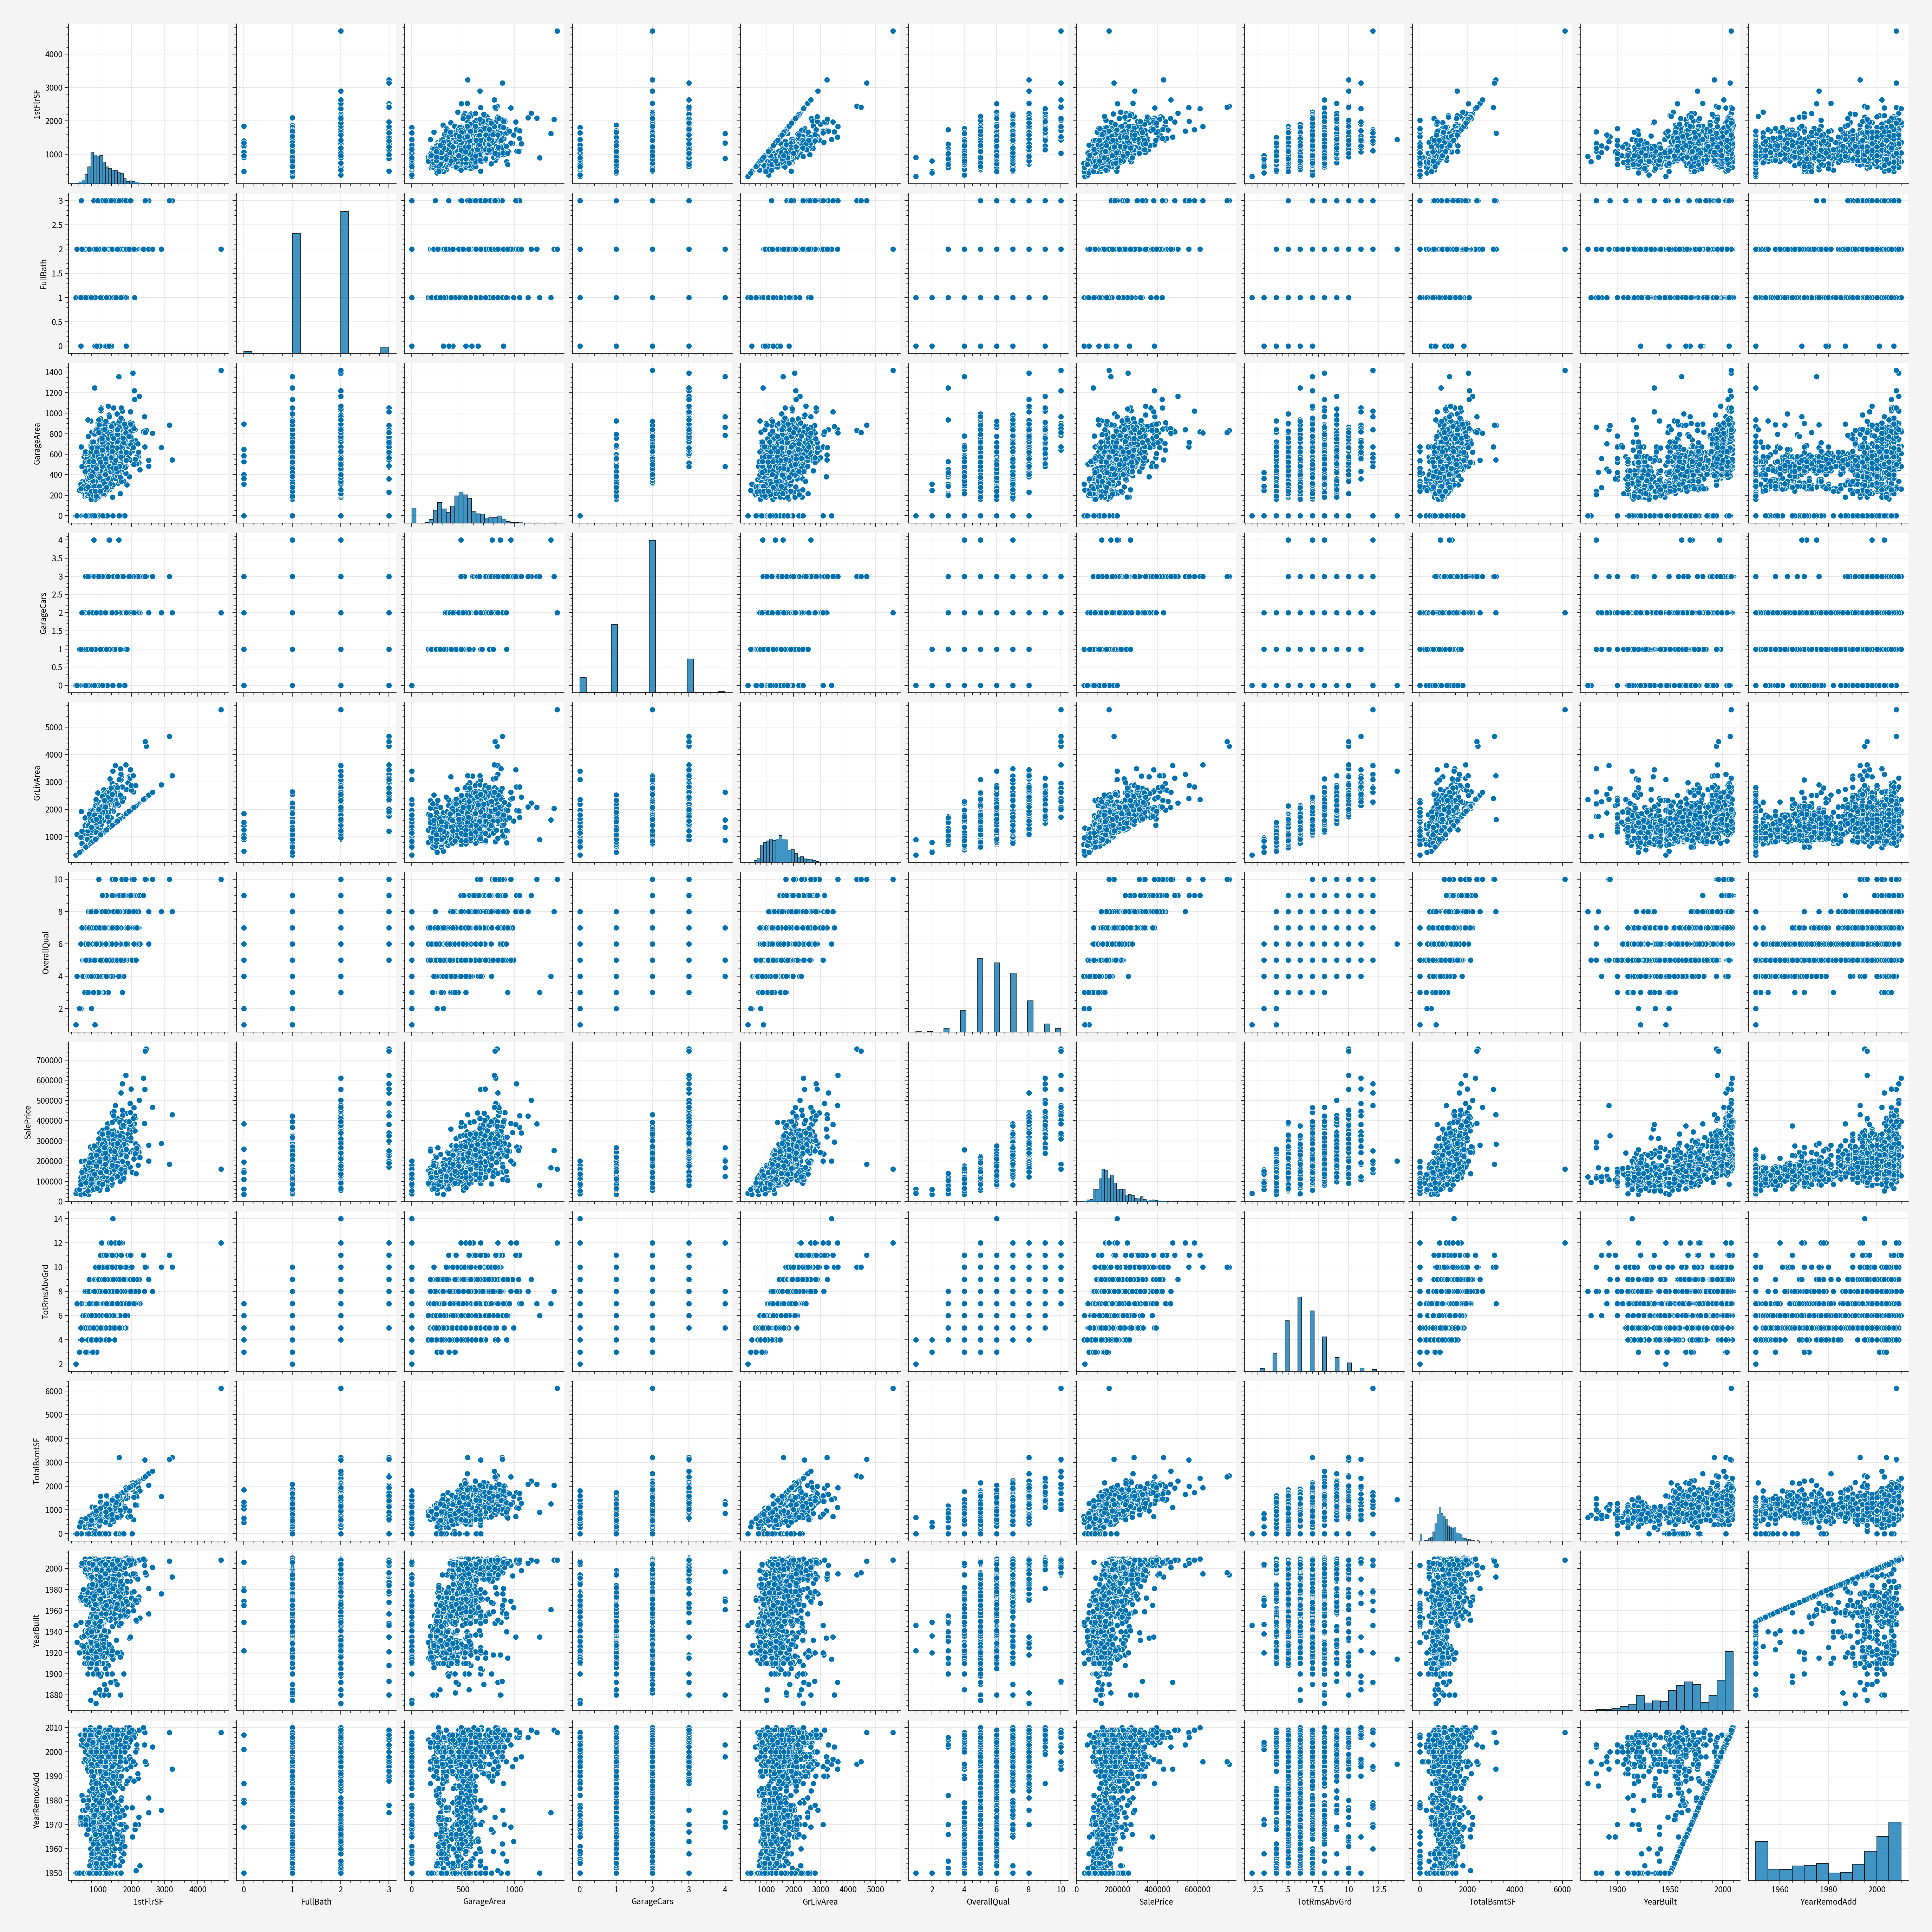

In [5]:
# pairplot top 10 correlation features + target
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10).index
top_corr = top_corr.union(['SalePrice'])

sns.pairplot(train[top_corr]);

# <center style="font-family:Arial">3. Data Processing and Cleaning </center>

In [6]:
print('Training Shape:', train.shape)
print('Test Shape:', test.shape)

Training Shape: (1460, 81)
Test Shape: (1459, 80)


In [7]:
# let's save the ID of each dataset
train_id = train['Id']
test_id = test['Id']
del train['Id']
del test['Id']

## <center style="font-family:Arial">Outliers</center>

<div style="color:black;
           font-size:120%;
           font-family:Arial">Focusing on the target variable (SalePrice), we can see that there are some outliers in features such as <code>GarageArea</code>, <code>GrLivArea</code> and <code>TotalBsmtSF</code>. </div>

In [8]:
train1 = train.copy()
train1 = train1.drop(train1[(train1['GarageArea']>1200) & (train1['SalePrice']<300000)].index)
train1 = train1.drop(train1[(train1['GrLivArea']>4000) & (train1['SalePrice']<300000)].index)
train1 = train1.drop(train1[(train1['TotalBsmtSF']>5000)].index)

In [9]:
print('Outliers removed =' , train.shape[0] - train1.shape[0])

Outliers removed = 5


## <center style="font-family:Arial">Split X and y</center>

In [10]:
# Split X and y (in train dataset)
X = train1.drop('SalePrice', axis=1)
y = train1['SalePrice'].to_frame()

# Add variable
X['train'] = 1
test['train'] = 0

# Combining train and test for data cleaning 
df = pd.concat([test, X])

In [11]:
print('Count of Features per Data Type:')
df.dtypes.value_counts()  

Count of Features per Data Type:


object     43
int64      26
float64    11
dtype: int64

In [12]:
# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 13945


# <center style="font-family:Arial">4. Feature Engineering </center>

## <center style="font-family:Arial">Missing values</center>

In [13]:
print('Missing Values per Column:')
df.isnull().sum().sort_values(ascending=False).head(25)

Missing Values per Column:


PoolQC          2905
MiscFeature     2810
Alley           2716
Fence           2343
FireplaceQu     1419
LotFrontage      485
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
Utilities          2
BsmtUnfSF          1
KitchenQual        1
dtype: int64

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>PoolQC</code> refers to the pool quality of the house. Data description says that having a NaN in this category means that the house doesn't have a pool.</div>

In [14]:
df['PoolQC'] = df['PoolQC'].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>MiscFeature</code> refers to miscellaneous features of the house. Data description says that having a NaN in this category means that the house doesn't have any.</div>

In [15]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>Alley</code> refers to the type of alley access to the property. Data description says that having a NaN in this category means that the house doesn't have any.</div>

In [16]:
df['Alley'] = df['Alley'].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>Fence</code> refers to the type of fencing around the property. Data description says that having a NaN in this category means that the house doesn't have a fence.</div>


In [17]:
df['Fence'] = df['Fence'].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>FireplaceQu</code> refers to the quality of the fireplace. Data description says that having a NaN in this category means that the house doesn't have a fireplace.</div>

In [18]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>LotFrontage</code> refers to the distance in feet between the street and the property. Let's impute the missing values with the median of the neighborhood.</div>

In [19]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda i: i.fillna(i.median()))

* <div style="color:black;
           font-size:120%;
           font-family:Arial">All the features that start with <code>Garage</code> and contain NaN means that those houses don't have a garage.</div>

In [20]:
# Let's take a look at the "Garage" features
garage_cols = [col for col in df if col.startswith('Garage')]
df[garage_cols]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0        Attchd       1961.0          Unf         1.0       730.0         TA   
1        Attchd       1958.0          Unf         1.0       312.0         TA   
2        Attchd       1997.0          Fin         2.0       482.0         TA   
3        Attchd       1998.0          Fin         2.0       470.0         TA   
4        Attchd       1992.0          RFn         2.0       506.0         TA   
...         ...          ...          ...         ...         ...        ...   
1455     Attchd       1999.0          RFn         2.0       460.0         TA   
1456     Attchd       1978.0          Unf         2.0       500.0         TA   
1457     Attchd       1941.0          RFn         1.0       252.0         TA   
1458     Attchd       1950.0          Unf         1.0       240.0         TA   
1459     Attchd       1965.0          Fin         1.0       276.0         TA   

     GarageCond  
0            TA  
1            TA  
2            TA  
3            TA  
4            TA  
...         ...  
1455         TA  
1456         TA  
1457         TA  
1458         TA  
1459         TA  

[2914 rows x 7 columns]

<div style="color:black;
           font-size:120%;
           font-family:Arial">We can see that some features are categorical and others numerical. Let's replace the NaN with None in the categorical features and in the numerical features with 0.</div>

In [21]:
# For the numerical features:
for i in df[garage_cols].select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(0)

# For the categorical features:
for i in df[garage_cols].select_dtypes(include='object').columns:
    df[i] = df[i].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial">All the features that start with <code>Bsmt</code> and contain NaN means that those houses don't have a basement.</div>

In [22]:
bsmt_cols = [col for col in df if col.startswith('Bsmt')]

# For the numerical features:
for i in df[bsmt_cols].select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(0)

# For the categorical features:
for i in df[bsmt_cols].select_dtypes(include='object').columns:
    df[i] = df[i].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial">All the features that start with <code>Mas</code> and contain NaN means that those houses don't have a masonry veneer.</div>

In [23]:
mas_cols = [col for col in df if col.startswith('Mas')]

# For the numerical features:
for i in df[mas_cols].select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(0)

# For the categorical features:
for i in df[mas_cols].select_dtypes(include='object').columns:
    df[i] = df[i].fillna('None')

* <div style="color:black;
           font-size:120%;
           font-family:Arial"><code>MSZoning</code> refers to the general zoning classification of the sale. Let's impute the missing values with the most common category of the neighborhood.</div>

In [24]:
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda i: i.fillna(i.value_counts().index[0]))

In [25]:
print('Missing Values left:')
df.isnull().sum().sort_values(ascending=False).head(10)

Missing Values left:


Functional      2
Utilities       2
Electrical      1
TotalBsmtSF     1
KitchenQual     1
Exterior1st     1
Exterior2nd     1
SaleType        1
BsmtHalfBath    0
BsmtFullBath    0
dtype: int64

<div style="color:black;
           font-size:120%;
           font-family:Arial">The rest of the <b>missing values</b> are minimal. I'm going to transform the remaining NaN to the mode of each column.</div>

In [26]:
# replace missing values for mode of each column
df = df.fillna(df.mode().iloc[0])

## <center style="font-family:Arial">Transforming some numerical categories into categorical</center>

<div style="color:black;
           font-size:120%;
           font-family:Arial">Reading the data description shows very clearly that some numerical features represent a specific category.</div>

In [27]:
df.describe().T

count          mean          std     min      25%     50%  \
MSSubClass     2914.0     57.112217    42.474217    20.0    20.00    50.0   
LotFrontage    2914.0     69.406829    21.191130    21.0    60.00    70.0   
LotArea        2914.0  10128.200755  7798.584415  1300.0  7473.00  9450.0   
OverallQual    2914.0      6.087509     1.405287     1.0     5.00     6.0   
OverallCond    2914.0      5.566232     1.113182     1.0     5.00     5.0   
YearBuilt      2914.0   1971.291352    30.286886  1872.0  1953.25  1973.0   
YearRemodAdd   2914.0   1984.254633    20.887641  1950.0  1965.00  1993.0   
MasVnrArea     2914.0    100.879204   178.071569     0.0     0.00     0.0   
BsmtFinSF1     2914.0    438.919012   444.059991     0.0     0.00   368.0   
BsmtFinSF2     2914.0     49.650309   169.311762     0.0     0.00     0.0   
BsmtUnfSF      2914.0    560.042210   438.937719     0.0   220.00   467.0   
TotalBsmtSF    2914.0   1048.611531   429.273260     0.0   792.25   988.0   
1stFlrSF       2914.0   1157.320178   384.986979   334.0   876.00  1082.0   
2ndFlrSF       2914.0    336.207275   428.204291     0.0     0.00     0.0   
LowQualFinSF   2914.0      4.702471    46.436218     0.0     0.00     0.0   
GrLivArea      2914.0   1498.229925   496.930960   334.0  1126.00  1443.0   
BsmtFullBath   2914.0      0.428964     0.523985     0.0     0.00     0.0   
BsmtHalfBath   2914.0      0.061428     0.245805     0.0     0.00     0.0   
FullBath       2914.0      1.567605     0.552491     0.0     1.00     2.0   
HalfBath       2914.0      0.379890     0.502811     0.0     0.00     0.0   
BedroomAbvGr   2914.0      2.860329     0.823228     0.0     2.00     3.0   
KitchenAbvGr   2914.0      1.044612     0.214638     0.0     1.00     1.0   
TotRmsAbvGrd   2914.0      6.447495     1.564767     2.0     5.00     6.0   
Fireplaces     2914.0      0.596088     0.644924     0.0     0.00     1.0   
GarageYrBlt    2914.0   1870.144132   450.040352     0.0  1957.00  1977.0   
GarageCars     2914.0      1.763898     0.760680     0.0     1.00     2.0   
GarageArea     2914.0    471.363075   213.086144     0.0   320.00   479.0   
WoodDeckSF     2914.0     93.575154   126.412139     0.0     0.00     0.0   
OpenPorchSF    2914.0     47.291009    67.141235     0.0     0.00    26.0   
EnclosedPorch  2914.0     23.137955    64.292224     0.0     0.00     0.0   
3SsnPorch      2914.0      2.606726    25.209546     0.0     0.00     0.0   
ScreenPorch    2914.0     16.089911    56.228619     0.0     0.00     0.0   
PoolArea       2914.0      2.090940    34.579098     0.0     0.00     0.0   
MiscVal        2914.0     50.721002   567.807459     0.0     0.00     0.0   
MoSold         2914.0      6.213452     2.713410     1.0     4.00     6.0   
YrSold         2914.0   2007.792725     1.315727  2006.0  2007.00  2008.0   
train          2914.0      0.499314     0.500085     0.0     0.00     0.0   

                    75%       max  
MSSubClass        70.00     190.0  
LotFrontage       80.00     313.0  
LotArea        11546.25  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       162.75    1600.0  
BsmtFinSF1       732.75    4010.0  
BsmtFinSF2         0.00    1526.0  
BsmtUnfSF        802.75    2336.0  
TotalBsmtSF     1301.50    5095.0  
1stFlrSF        1383.75    5095.0  
2ndFlrSF         704.00    2065.0  
LowQualFinSF       0.00    1064.0  
GrLivArea       1743.00    5095.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       4.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      15.0  
Fireplaces         1.00       4.0  
GarageYrBlt     2001.00    2207.0  
GarageCars         2.00       5.0  
GarageArea       576.00    1488.0  
WoodDeckSF       168.00    1424.0  
OpenPorchSF       70.00     742.0  
EnclosedP

In [28]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)           # months is always categorical
df['YrSold'] = df['YrSold'].astype(str)           # year sold just have 5 years

## <center style="font-family:Arial">Adding relevant features</center>

<div style="color:black;
           font-size:120%;
           font-family:Arial">Adding relevant features can increase the accuracy of the prediction.</div>

In [29]:
df['Total_House_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Total_Home_Quality'] = (df['OverallQual'] + df['OverallCond'])/2
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

## <center style="font-family:Arial">Skewed features</center>

<div style="font-size:120%">Outliers are silent killers in prediction models. In this section, I'll imput the features that are not normally distributed.</div>

* <div style="font-size:120%">First, I'll select the features that have a skew higher than 0.5.</div>

In [30]:
numeric_cols = df.select_dtypes(exclude='object').columns

skew_limit = 0.5
skew_vals = df[numeric_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

Skew
MiscVal             21.949442
PoolArea            17.688586
LotArea             13.168399
LowQualFinSF        12.084424
3SsnPorch           11.371955
KitchenAbvGr         4.300206
BsmtFinSF2           4.144176
EnclosedPorch        4.002083
ScreenPorch          3.944742
BsmtHalfBath         3.929621
MasVnrArea           2.624455
OpenPorchSF          2.530314
WoodDeckSF           1.847494
1stFlrSF             1.260200
LotFrontage          1.105971
GrLivArea            1.070551
Total_House_SF       1.010874
BsmtFinSF1           0.981793
BsmtUnfSF            0.916129
2ndFlrSF             0.860449
TotRmsAbvGrd         0.750440
Fireplaces           0.726331
HalfBath             0.696987
TotalBsmtSF          0.671945
BsmtFullBath         0.622594
OverallCond          0.569084
Total_Home_Quality  -0.565021
YearBuilt           -0.600470
GarageYrBlt         -3.904268

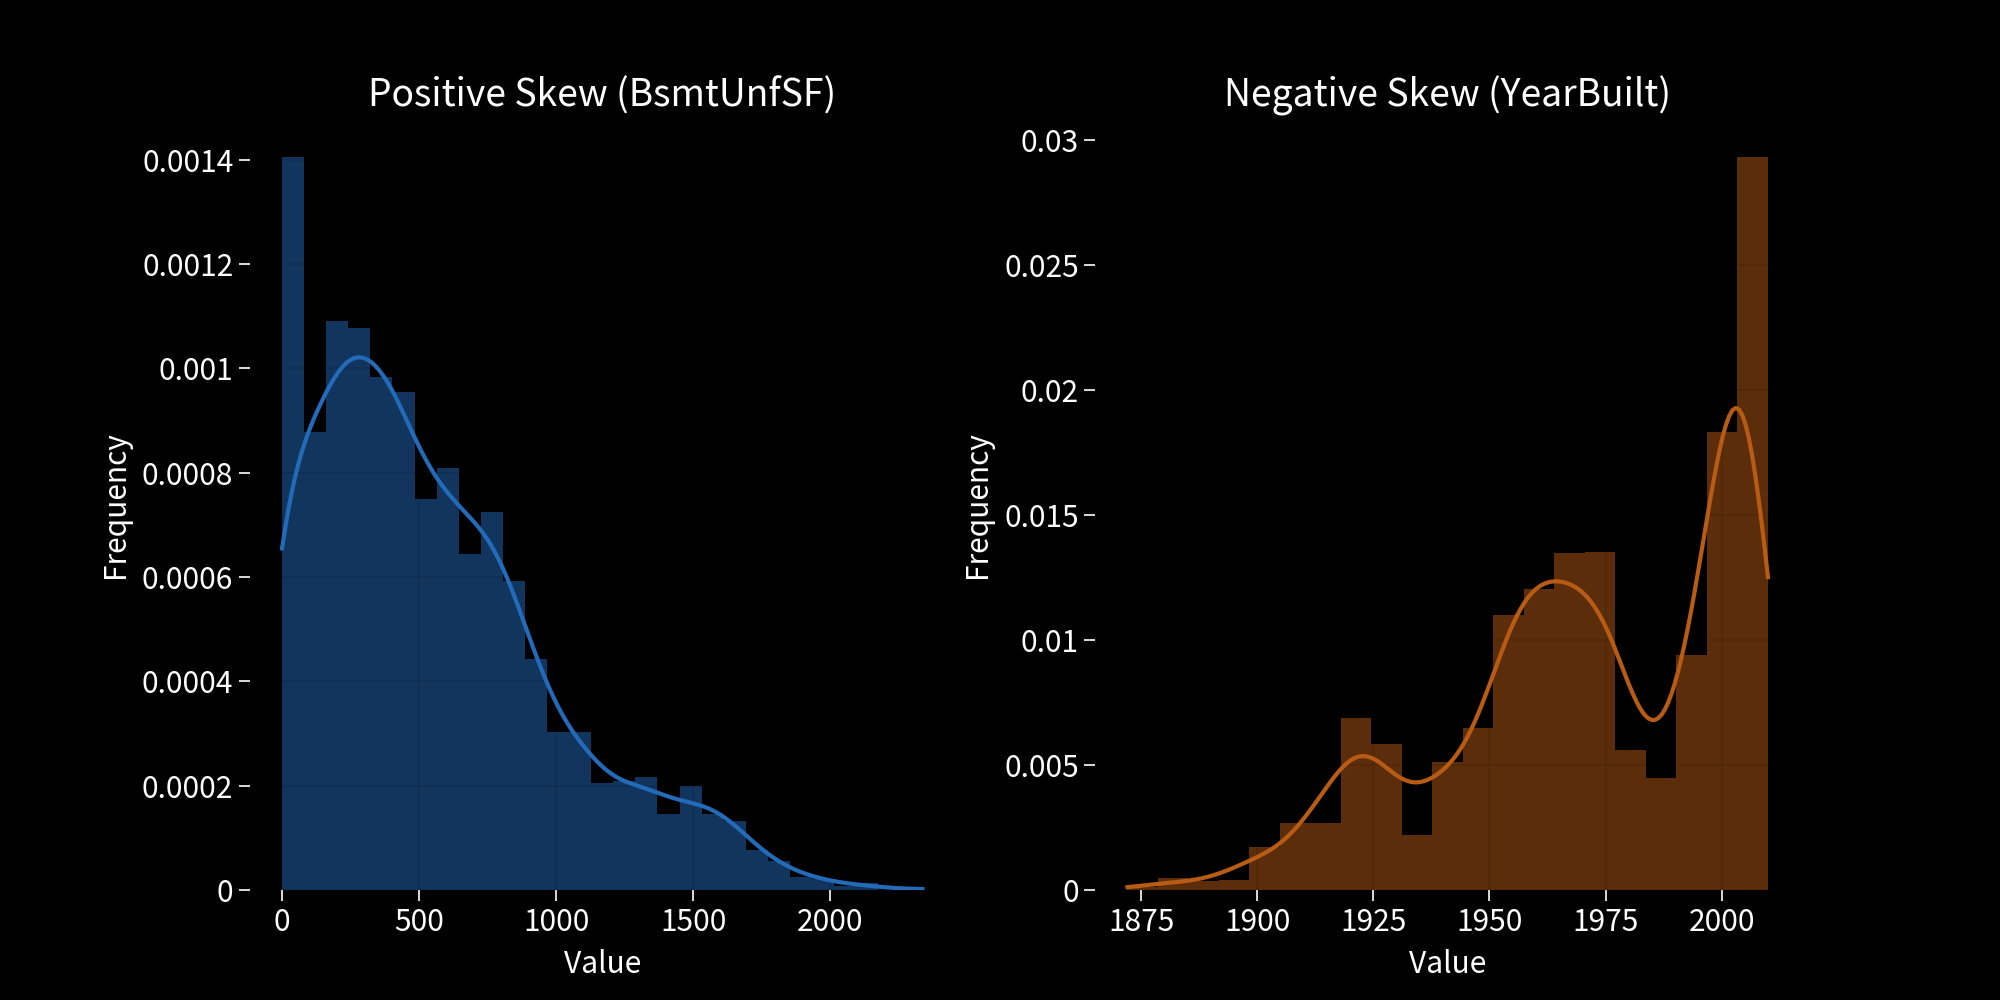

In [31]:
# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'
mpl.rcParams['font.size'] = 12

fig, (ax_positive, ax_negative) = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('black')
ax_positive.patch.set_facecolor('black')
ax_negative.patch.set_facecolor('black')

sns.histplot(df['BsmtUnfSF'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(df['YearBuilt'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)

ax_positive.tick_params(axis='x', colors='white')
ax_positive.tick_params(axis='y', colors='white')
ax_negative.tick_params(axis='x', colors='white')
ax_negative.tick_params(axis='y', colors='white')

ax_positive.set(ylabel='Frequency', xlabel='Value');
ax_negative.set(ylabel='Frequency', xlabel='Value');

ax_positive.xaxis.label.set_color('white')
ax_positive.yaxis.label.set_color('white')
ax_negative.xaxis.label.set_color('white')
ax_negative.yaxis.label.set_color('white')

ax_positive.set_title('Positive Skew (BsmtUnfSF)', color='white', fontsize= 15)
ax_negative.set_title('Negative Skew (YearBuilt)', color='white', fontsize= 15)



# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax_positive.spines[i].set_visible(False)

for i in ['top', 'bottom', 'left', 'right']:
    ax_negative.spines[i].set_visible(False)

<div style="color:black;
           font-size:120%;
           font-family:Arial">In my case, I'll use the Box-Cox transformation to transform all the skew features into a normal distribution.</div>

In [32]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

## <center style="font-family:Arial">Transforming target</center>

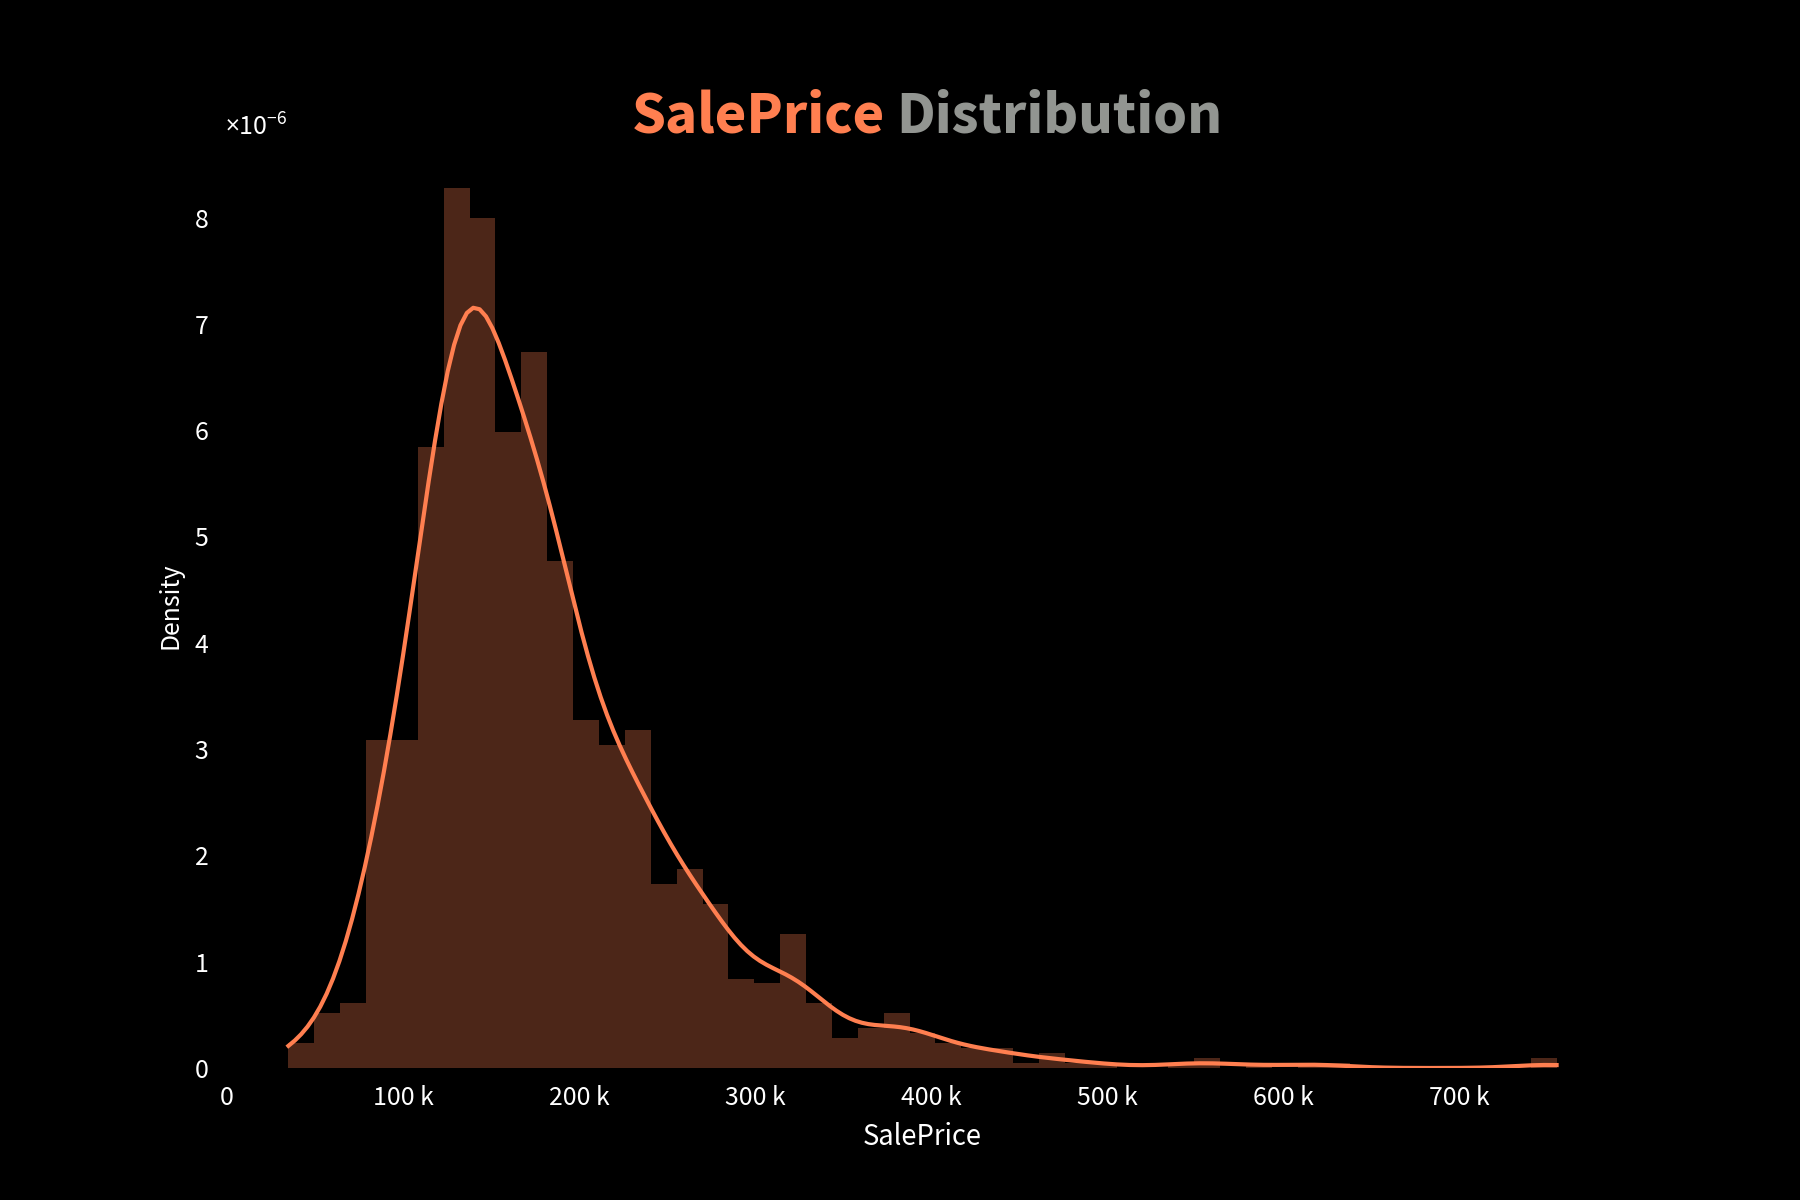

In [33]:
import matplotlib.ticker as ticker

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'
mpl.rcParams['font.size'] = 10

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

sns.histplot(y['SalePrice'], stat='density', linewidth=0, color = '#ff7f50', kde=True, alpha=0.3);

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.xaxis.set_major_formatter(ticker.EngFormatter())

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('SalePrice', fontsize=11);

plt.text(230000, 0.0000088, "SalePrice", size=22, color="#ff7f50", fontweight="bold");
plt.text(380000, 0.0000088, "Distribution", size=22, color="grey", fontweight="bold");

In [34]:
# log(1+x) transform
y["SalePrice"] = np.log1p(y["SalePrice"])

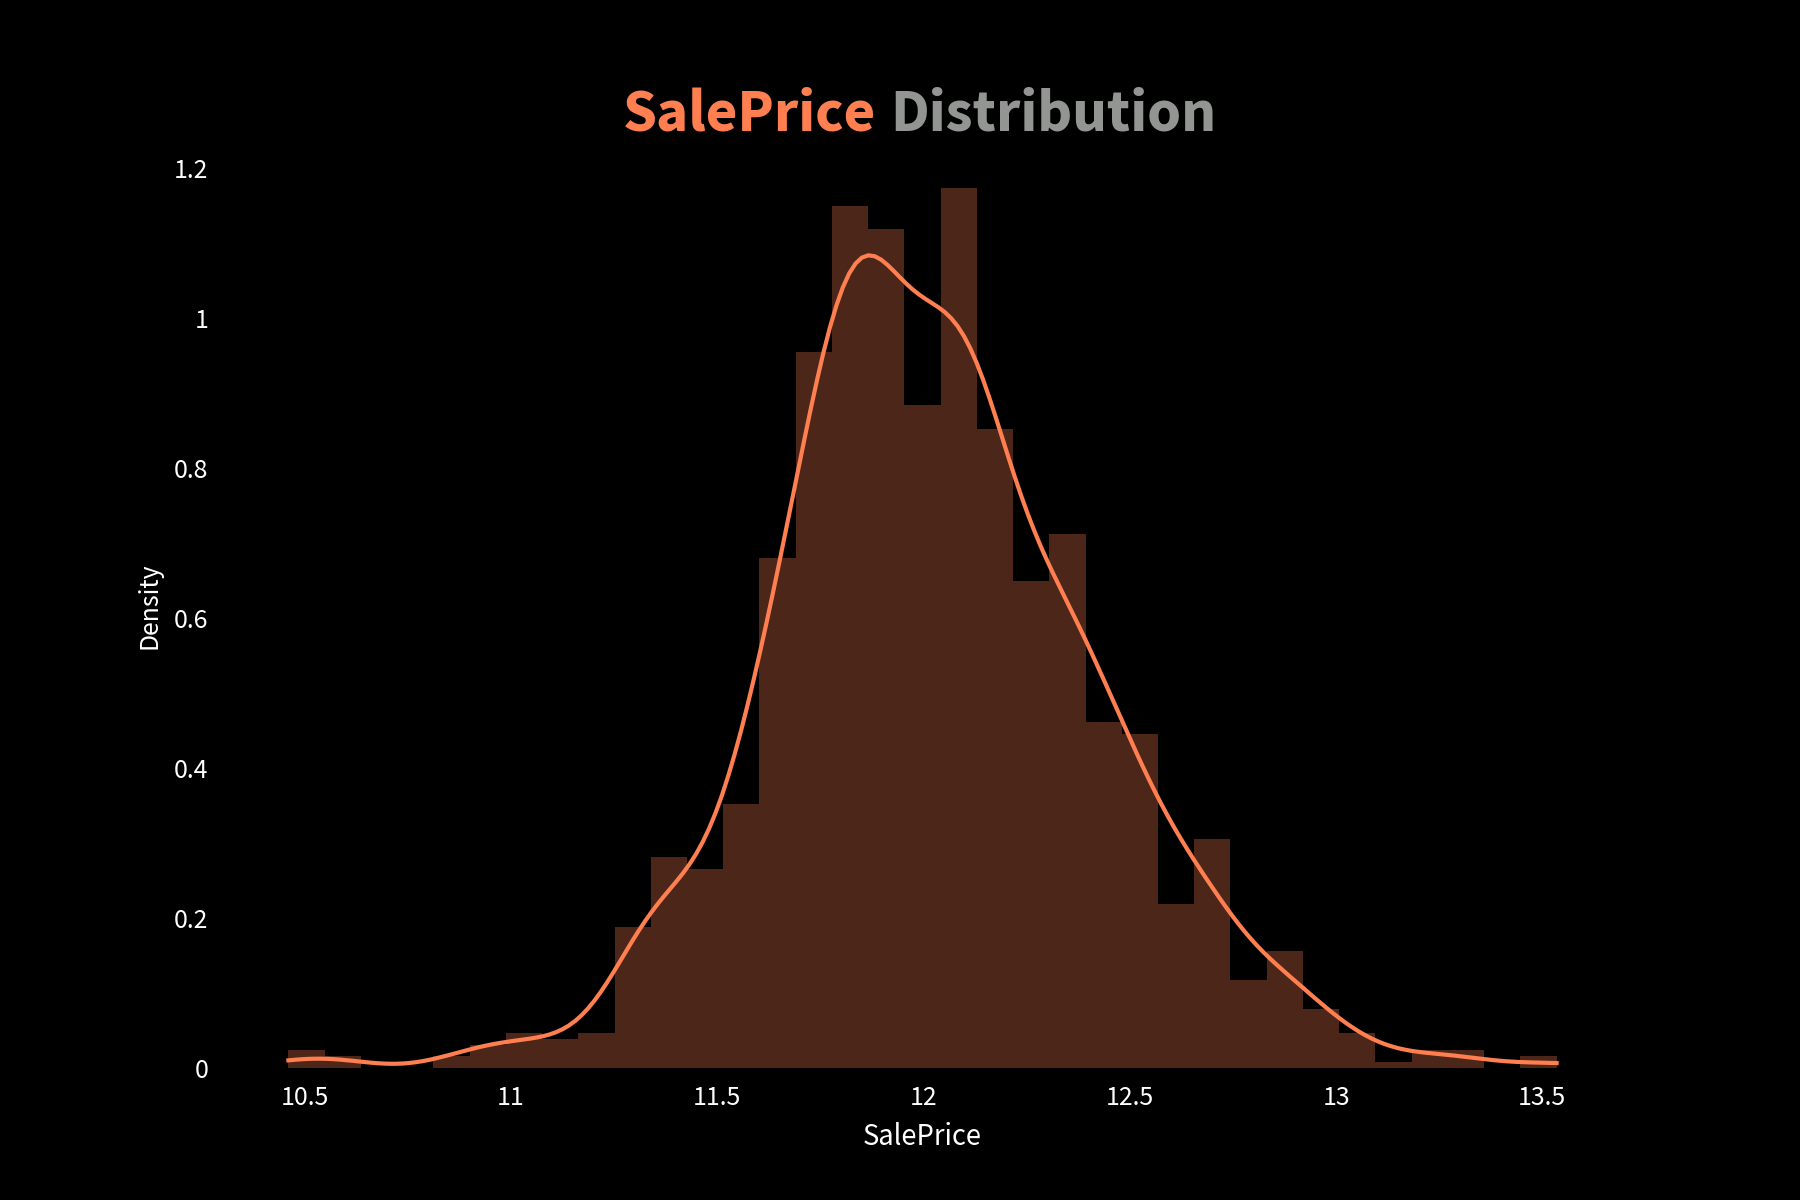

In [35]:
import matplotlib.ticker as ticker

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'
mpl.rcParams['font.size'] = 10

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

sns.histplot(y['SalePrice'], stat='density', linewidth=0, color = '#ff7f50', kde=True, alpha=0.3);

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.xaxis.set_major_formatter(ticker.EngFormatter())

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('SalePrice', fontsize=11);

plt.text(11.27, 1.25, "SalePrice", size=22, color="#ff7f50", fontweight="bold");
plt.text(11.92, 1.25, "Distribution", size=22, color="grey", fontweight="bold");

## <center style="font-family:Arial">Encoding categorical features</center>

In [36]:
categ_cols = df.dtypes[df.dtypes == np.object]        # filtering by categorical variables
categ_cols = categ_cols.index.tolist()                # list of categorical fields

df_enc = pd.get_dummies(df, columns=categ_cols, drop_first=True)   # One hot encoding

In [37]:
X = df_enc[df_enc['train']==1]
test = df_enc[df_enc['train']==0]
X.drop(['train'], axis=1, inplace=True)
test.drop(['train'], axis=1, inplace=True)

# <center style="font-family:Arial">5. Modelling </center>

In [38]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [39]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

## <center style="font-family:Arial">Lasso Regression + Cross-Validation</center>
    
* <div style="font-size:120%">Lasso Regression is a linear model that minimizes its cost function.</div>

* <div style="font-size:120%">The cost funtion has a regularization parameter -<b>L1 penalty</b>- with an alpha that tunes the intensity of this penalty term. </div>

* <div style="font-size:120%">This penalty reduces some features to zero, which makes it easier to understand and interpret the prediction.</div>

* <div style="font-size:120%">The larger the value of alpha, the more coefficients are forced to be zero.</div>

* <div style="font-size:120%">The Lasso regression helps reduce over-fitting and feature selection.</div>



In [40]:
lasso = Lasso(max_iter = 100000, normalize = True)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

print('The Lasso I:')
print("Alpha =", lassocv.alpha_)
print("RMSE =", rmse(y_test, lasso.predict(X_test)))

The Lasso I:
Alpha = 6.872779832960424e-05
RMSE = 0.12072477839971668


In [41]:
# Let's try the same. This time setting up alpha...
alpha = np.geomspace(1e-5, 1e0, num=6)
lasso_cv_model = LassoCV(alphas = alpha, cv = 10, max_iter = 100000, normalize = True).fit(X_train,y_train)
lasso_tuned = Lasso(max_iter = 100000, normalize = True).set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)
print('The Lasso II:')
print("Alpha =", lasso_cv_model.alpha_)
print("RMSE =", rmse(y_test, lasso_tuned.predict(X_test)))

The Lasso II:
Alpha = 0.0001
RMSE = 0.11962451145557704


## <center style="font-family:Arial">Ridge Regression + Cross-Validation</center>

* <div style="font-size:120%">The Ridge Regression is similar to the Lasso Regression: it's also a linear model that minimizes its cost function and has a regularization parameter -<b>L2 penalty</b>-.</div>

* <div style="font-size:120%">The lower the value of the alpha, the more linear the model will be.</div>

* <div style="font-size:120%">This model doesn't force some features to zero. </div>

* <div style="font-size:120%">The Ridge Regression shrinks the coefficients, and it helps to reduce the model complexity and multi-collinearity.</div>

In [42]:
alphas = np.geomspace(1e-9, 5, num=100)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)

print('Ridge Regression:')
print("Alpha =", ridgecv.alpha_)
print("RMSE =", rmse(y_test, ridge.predict(X_test)))

Ridge Regression:
Alpha = 0.21251935471767855
RMSE = 0.12350180903194746


## <center style="font-family:Arial">Support Vector Regression (SVR) + Cross-Validation</center>

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVR


kf = KFold(shuffle=True, random_state=1234, n_splits=10)

X_train_scale = RobustScaler().fit_transform(X_train)
X_test_scale = RobustScaler().fit_transform(X_test)

parameters = {'C':[20, 30, 40], 'gamma': [1e-4, 3e-4, 5e-4],'epsilon':[0.1, 0.01, 0.05]}
svr = SVR(kernel='rbf')
clf = GridSearchCV(svr, parameters, cv=kf)
clf.fit(X_train_scale,y_train)
clf.best_params_

{'C': 20, 'epsilon': 0.01, 'gamma': 0.0003}

In [44]:
svr = SVR(kernel ='rbf', C= 20, epsilon= 0.01, gamma=0.0003)
svr.fit(X_train_scale,y_train)

print('SVR Regression:')
print("RMSE =", rmse(y_test, svr.predict(X_test_scale)))

SVR Regression:
RMSE = 0.12708575951074244


# <center style="font-family:Arial">6. Interpretation </center>

<div style="font-size:120%">As mentioned previously, the Lasso regression is a very easy model to interpret, and that's why for this notebook I'll base the features importance on the <b>Lasso model</b>.</div>

In [45]:
print('Out of {} coefficients, {} are non-zero with Lasso.'
     .format(len(lasso_tuned.coef_), len(lasso_tuned.coef_.nonzero()[0])))

Out of 288 coefficients, 116 are non-zero with Lasso.


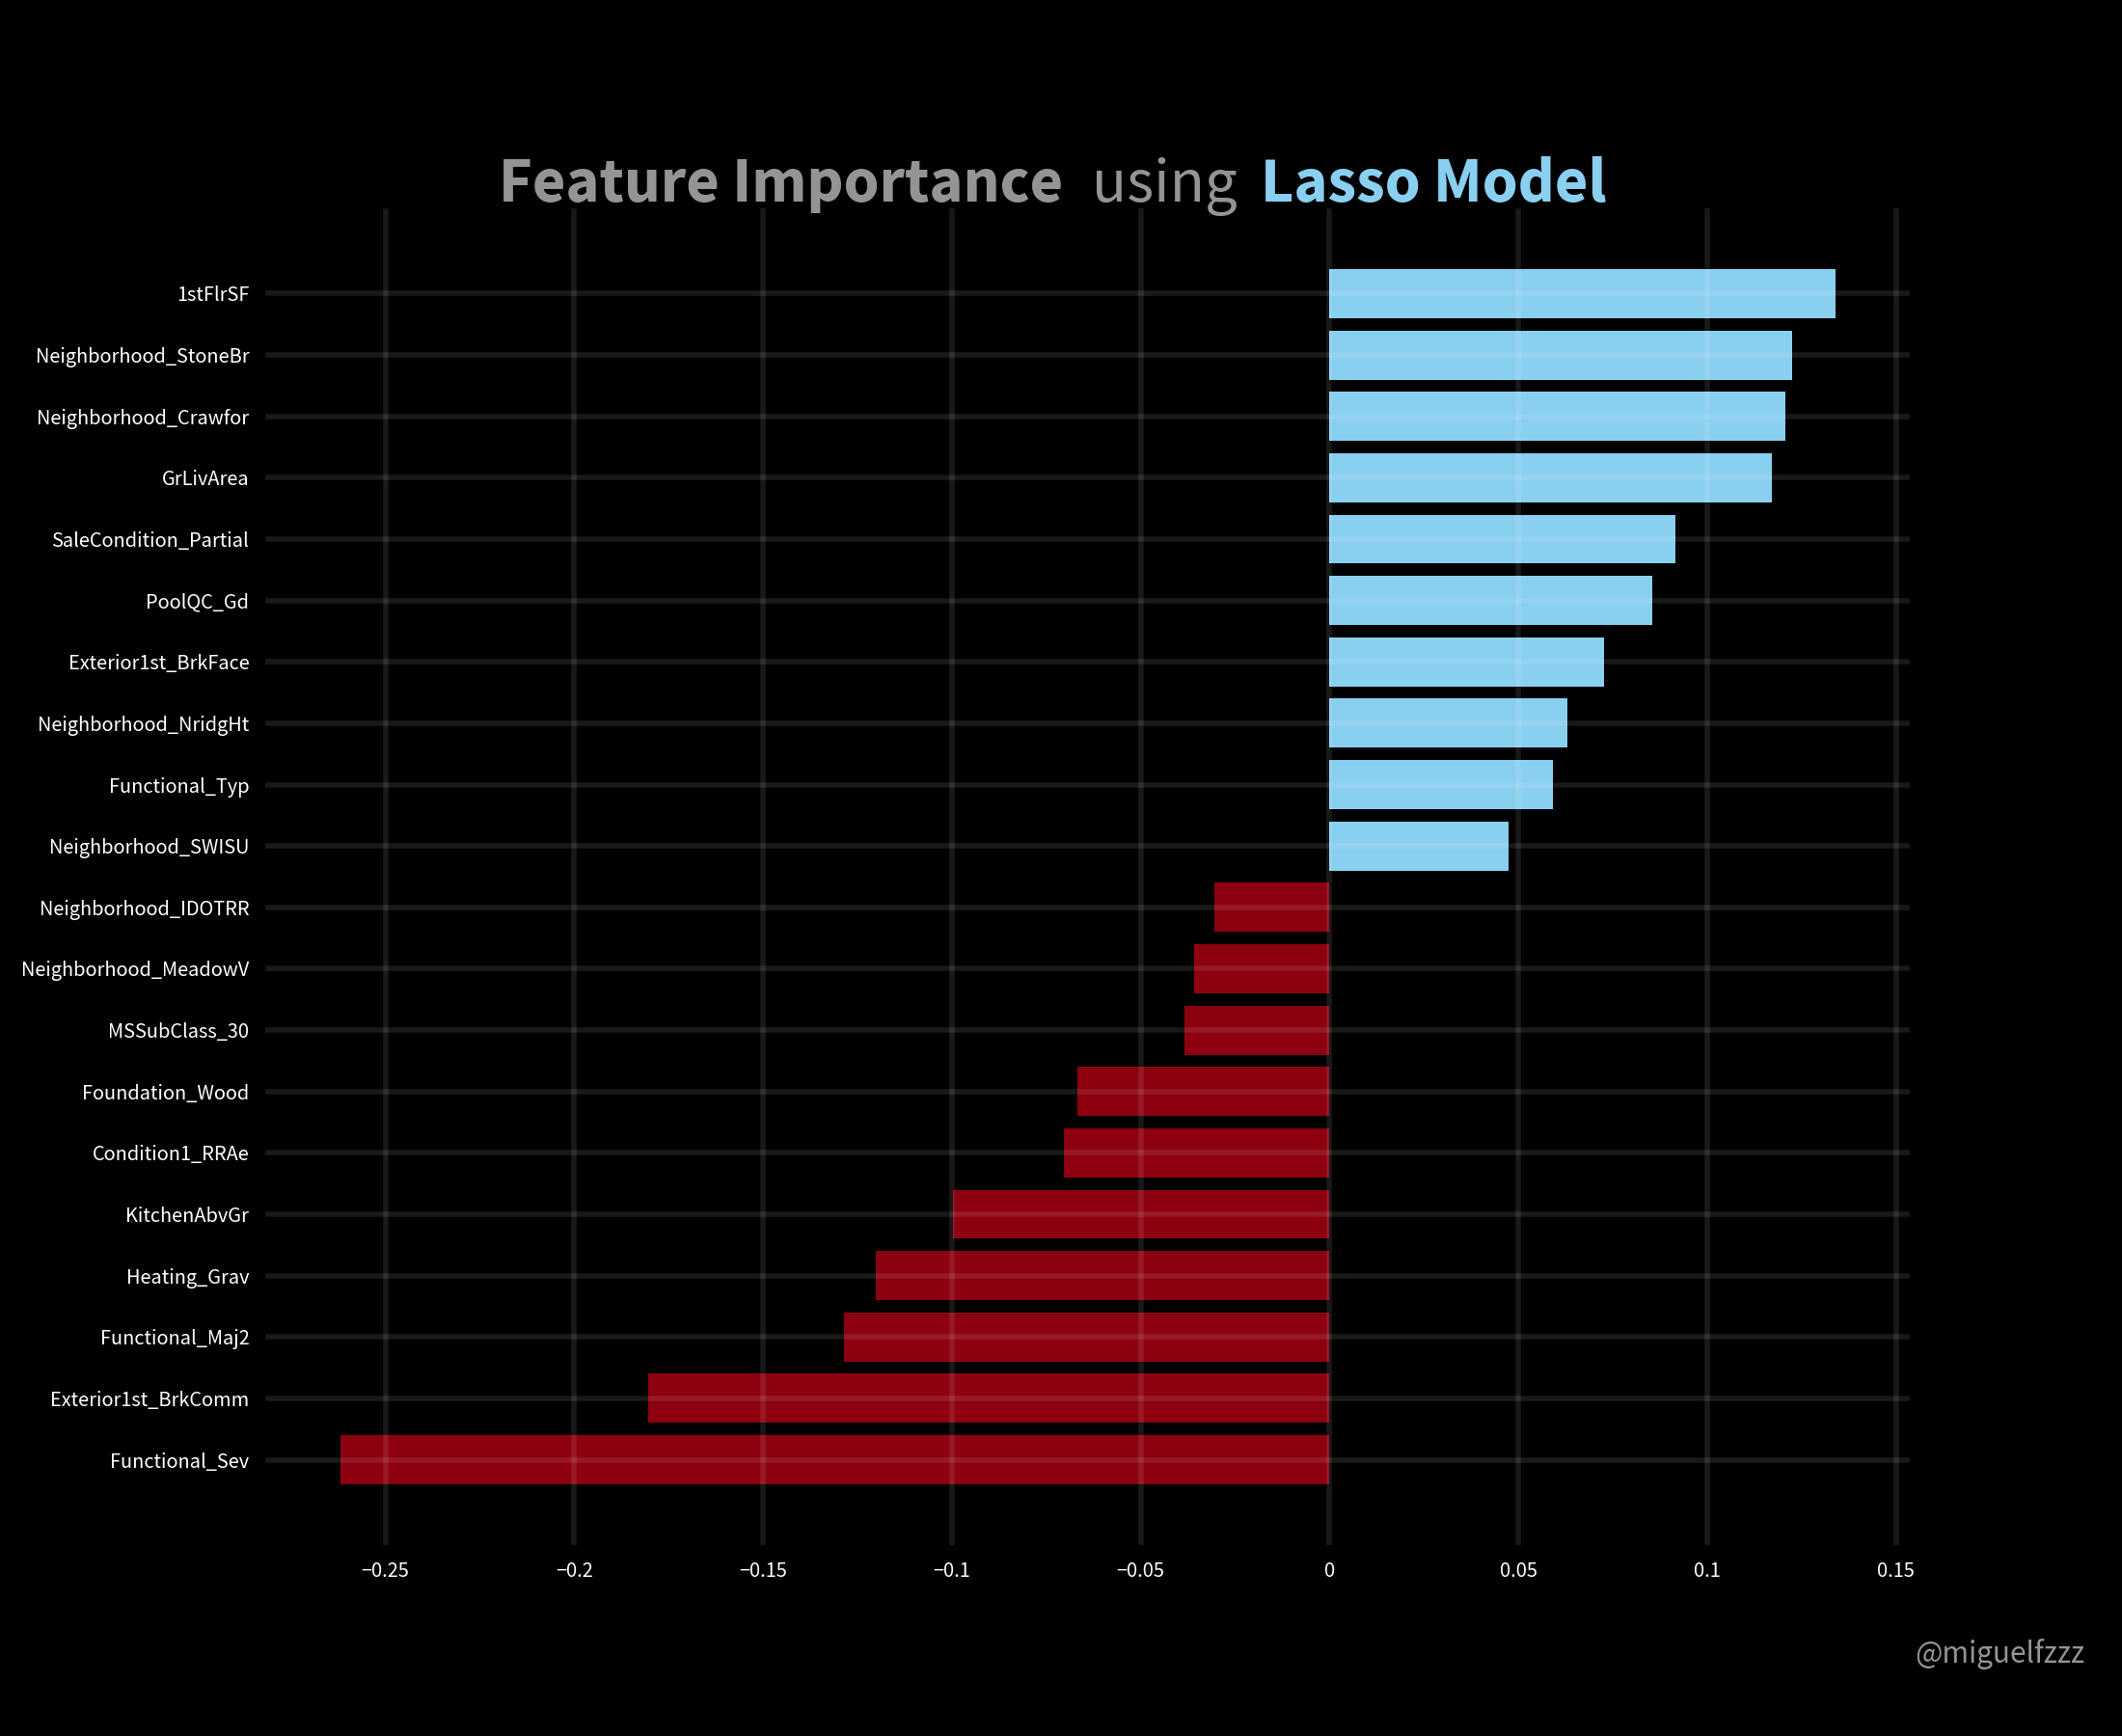

In [46]:
# Selecting features importance
coefs = pd.Series(lasso_tuned.coef_, index = test.columns)

lasso_coefs = pd.concat([coefs.sort_values().head(10),
                         coefs.sort_values().tail(10)])

lasso_coefs = pd.DataFrame(lasso_coefs, columns=['importance'])

# Visualization
fig, ax = plt.subplots(figsize =(11, 9))

ax.barh(lasso_coefs.index, lasso_coefs.importance, align='center', 
        color = np.where(lasso_coefs['importance'] < 0, 'crimson', '#89CFF0'))

plots_design()

plt.text(-0.22, 20.5, "Feature Importance", size=24, color="grey", fontweight="bold");
plt.text(-0.063, 20.5, "using", size=24, color="grey");
plt.text(-0.0182, 20.5, "Lasso Model", size=24, color="#89CFF0", fontweight="bold");

# Author
plt.text(0.2, -3.3, "@miguelfzzz", fontsize=12, ha="right", color='grey');

<div style="font-size:120%">All the features in blue positively affect the sale price of the house, which means this characteristic increases the price of the house. Vice versa, all the features in red negatively affect the sale price of the house.</div>

<center style="font-size: 24px">If you liked this notebook, please don't forget to comment and upvote. Thank you!</center>